In [1]:
import pandas as pd  
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 19,
         'axes.titlesize':23,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
def set_labels(title, xlabel="", ylabel=""):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [4]:
df = pd.read_csv("INpreprocessed.csv")

In [5]:
df.isnull().sum()

video_id                    0
title                       0
channel_title               0
category_id                 0
views                       0
likes                       0
dislikes                    0
comment_count               0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               250
trend_date                  0
trend_month                 0
trend_year                  0
pub_date                    0
pub_month                   0
pub_year                    0
pub_hour                    0
file_path                   0
dtype: int64

In [6]:
df.describe()

,category_id,views,likes,dislikes,comment_count,trend_date,trend_month,trend_year,pub_date,pub_month,pub_year,pub_hour
count,30098.000000,3.009800e+04,3.009800e+04,3.009800e+04,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000
mean,21.408997,1.182208e+06,3.190725e+04,1.921989e+03,3159.406705,5.283341,15.858462,17.766131,15.775168,5.344873,17.755432,10.616586
std,6.749239,3.475862e+06,1.066138e+05,1.788343e+04,16457.743049,3.795210,8.809644,0.423297,8.765619,3.831658,0.429838,5.044901
min,1.000000,4.287000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,17.000000,0.000000
25%,23.000000,1.369780e+05,1.131000e+03,1.300000e+02,112.000000,2.000000,8.000000,18.000000,8.000000,2.000000,18.000000,6.000000
50%,24.000000,3.378320e+05,4.066000e+03,3.850000e+02,435.000000,4.000000,16.000000,18.000000,16.000000,4.000000,18.000000,11.000000
75%,24.000000,8.799642e+05,1.856925e+04,1.163000e+03,1603.000000,6.000000,23.000000,18.000000,23.000000,6.000000,18.000000,14.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,12.000000,31.000000,18.000000,31.000000,12.000000,18.000000,23.000000


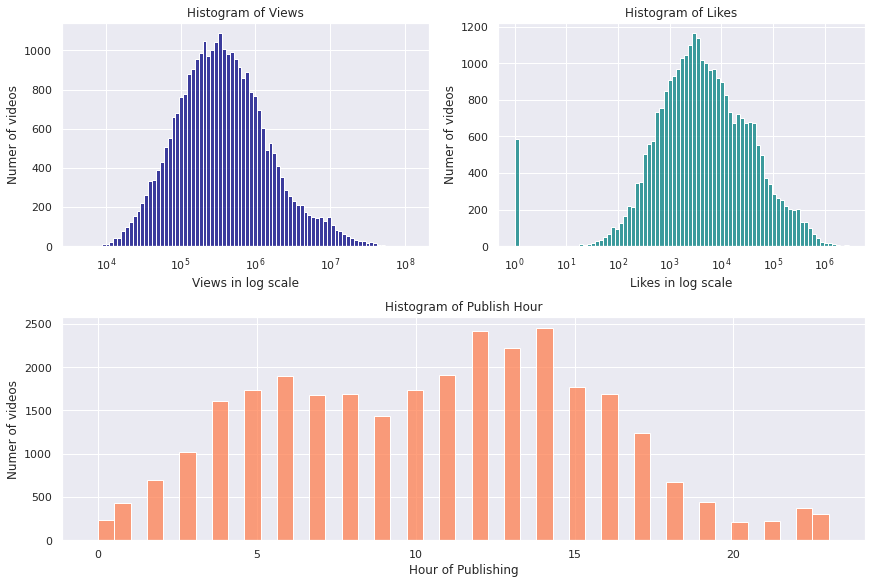

In [7]:
sns.set_theme()
fig = plt.figure(constrained_layout = True)

gs = fig.add_gridspec(2,2)
fax1 = fig.add_subplot(gs[0,0])
sns.histplot(df['views'], log_scale=True,ax = fax1,color = 'navy')
fax1.set_title("Histogram of Views")
fax1.set_xlabel("Views in log scale")
fax1.set_ylabel("Numer of videos")
#set_labels("Histogram of views", "Views", "Number of videos")

fax2 = fig.add_subplot(gs[0,1])
sns.histplot(df['likes'] + 1, log_scale=True,ax = fax2,color='teal')
fax2.set_title("Histogram of Likes")
fax2.set_xlabel("Likes in log scale")
fax2.set_ylabel("Numer of videos")

fax3 = fig.add_subplot(gs[1,:])
sns.histplot(df['pub_hour'],ax = fax3,color = 'coral')
fax3.set_title("Histogram of Publish Hour")
fax3.set_xlabel("Hour of Publishing")
fax3.set_ylabel("Numer of videos")

plt.show()

In [8]:
# when converted to IST, these times indicate peaks at 12pm and 7 pm

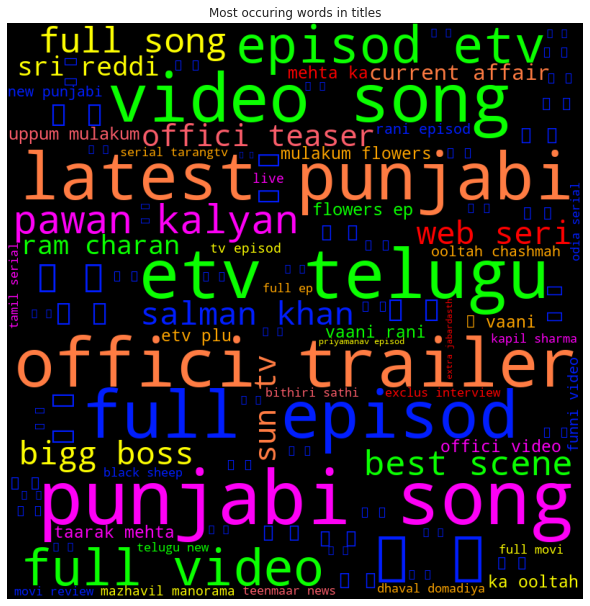

In [9]:
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ["#fe0000", "#fdfe02", "#0bff01", "#011efe", "#fe00f6", "#f95d6a", "#ff7c43", "#ffa600"]
    return colors[len(word)%len(colors)]

title  = df['title']

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in title: 
    
    val = str(val) 
    tokens = val.split() 

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                    stopwords = stopwords, 
                    min_font_size = 10, background_color="#000000",
                    color_func=col_func, max_words=100).generate(comment_words) 


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.title("Most occuring words in titles")

plt.show()

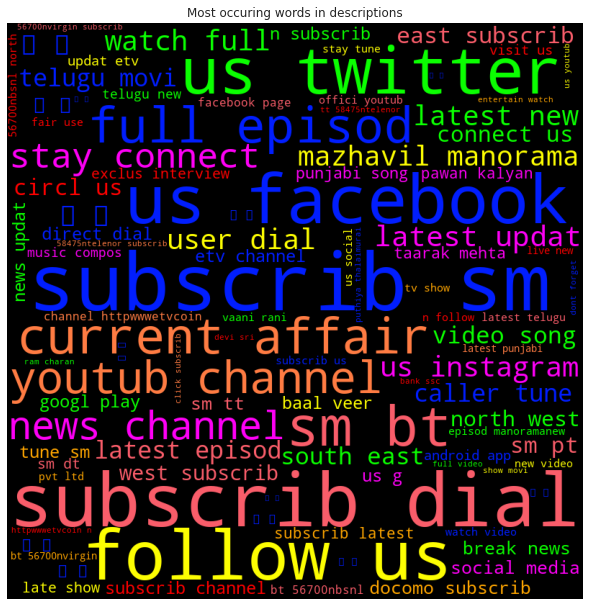

In [10]:
desc  = df['description']

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in desc: 
    
    val = str(val) 
    tokens = val.split() 

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='#000000', 
                    stopwords = stopwords, color_func=col_func,
                    min_font_size = 10, max_words=100).generate(comment_words) 


plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.title("Most occuring words in descriptions")

plt.show()

In [12]:
# videos that trended for the longest
most_trending = df.groupby('video_id').size().sort_values(ascending=False).head(10)
idx = most_trending.index.values
tdf = df[df['video_id'].isin(idx)].drop_duplicates(subset=['video_id'])
tdf['trending_days'] = tdf['video_id'].map(most_trending)
display(tdf.drop(columns=['category_id','video_id','file_path']))

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,trend_date,trend_month,trend_year,pub_date,pub_month,pub_year,pub_hour,trending_days
105,స‌మంత కంట‌త‌డి samantha becam emot samantha na...,Friday Poster,31052,36,11,2,False,False,False,స‌మంత కంట‌త‌డి samantha becam emot samantha na...,11,14,17,13,11,17,8,417
14726,mill lo na guri ft sukh full song jaani satti ...,Geet MP3,2168315,117689,6907,10407,False,False,False,geet mp3 gkdigit present new track mill lo na ...,2,27,18,26,2,18,12,13
20346,garmi ke sideeffect ashish chanchlani,ashish chanchlani vines,4227847,387791,9279,24003,False,False,False,made special video summer season younkya aap b...,4,14,18,13,4,18,14,13
22102,sanju offici teaser ranbir kapoor rajkumar hirani,FoxStarHindi,18639195,511763,15606,32435,False,False,False,live time dramat enigmat saga sanjay dutt come...,4,25,18,24,4,18,7,16
25778,tochan full video sidhu moosewala byg byrd son...,Humble Music,5659320,112530,3180,10480,False,False,False,humbl music present tochan singer sidhu moosew...,5,18,18,17,5,18,7,13
27794,sanju offici trailer ranbir kapoor rajkumar hi...,FoxStarHindi,21739537,549875,16991,41068,False,False,False,live time dramat enigmat saga sanjay dutt come...,5,31,18,30,5,18,7,14
27795,restaur sutiyapa ashish chanchlani,ashish chanchlani vines,4613979,337315,15396,27261,False,False,False,present youth type peopl find indian restaur “...,5,31,18,30,5,18,13,13
27805,golak bugni bank te batua full movi hd harish ...,Rhythm Boyz,225528,9336,222,438,False,False,False,rhythm boyz entertain hayr omje studio present...,5,31,18,31,5,18,13,14
28564,result ka mahool amit bhadana,Amit Bhadana,3385971,326085,9541,38656,False,False,False,video intens result days♠ download loco app ht...,6,5,18,4,6,18,15,12
28787,कस्टमर केयर वाली छोरिया राजस्थानी सुपरहिट कॉमे...,RDC Rajasthani,75248,1572,170,101,False,False,False,कस्टमर केयर वाली छोरिया राजस्थानी सुपरहिट कॉमे...,6,6,18,6,6,18,8,13


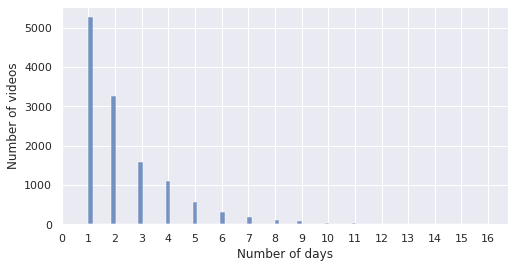

In [13]:
#to remove the distplot deprecated warning
import warnings
warnings.filterwarnings('ignore')

freq_df = df[['video_id','title','channel_title']]
freq_df['counter'] = 1
freq_df = freq_df.groupby('video_id',as_index=False).sum().sort_values(by = 'counter',ascending=False)

#the most frequent one comes out to be the entries for which id is not available hence, removing that entry
# id is #NAME?
freq_df = freq_df.drop(axis=1,index=[0])
#print(freq_df)
fig,ax = plt.subplots(figsize=(8,4))
sns.histplot(freq_df['counter'],ax=ax)
ax.set_xlabel("Number of days")
ax.set_ylabel("Number of videos")
ax.set_xticks(range(17))
plt.show()

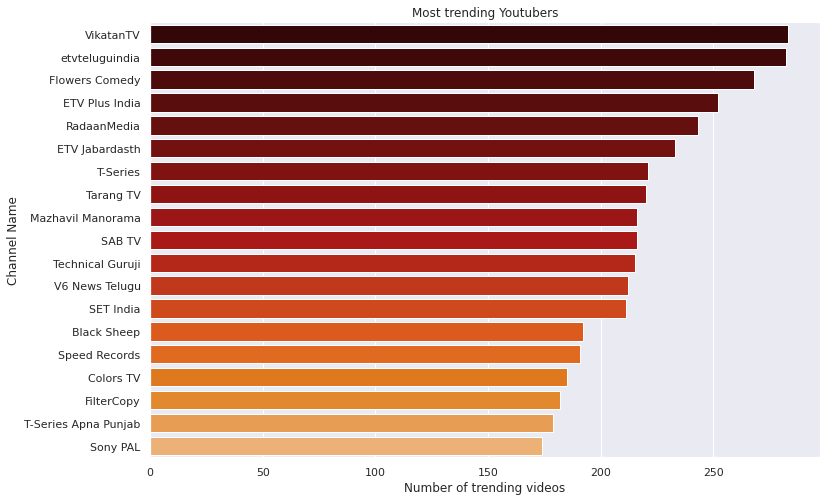

In [14]:
# channels with most trending videos
tdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(19)
sns.barplot(x="video_count", y="channel_title", data=tdf,
            palette=sns.color_palette('gist_heat', n_colors=25)[3:]);
set_labels("Most trending Youtubers", "Number of trending videos", "Channel Name")
plt.show()

In [15]:
import json

with open('categories.json') as f:
  categories = json.load(f)

In [16]:
cat_map={}
for cat in categories["items"]:
    cat_map[cat["id"]]=cat["snippet"]["title"]

In [17]:
def get_cat(n):
    try:
        return cat_map[str(n)]
    except:
        return "Other"

In [18]:
df["category_id"]=df["category_id"].apply(get_cat)

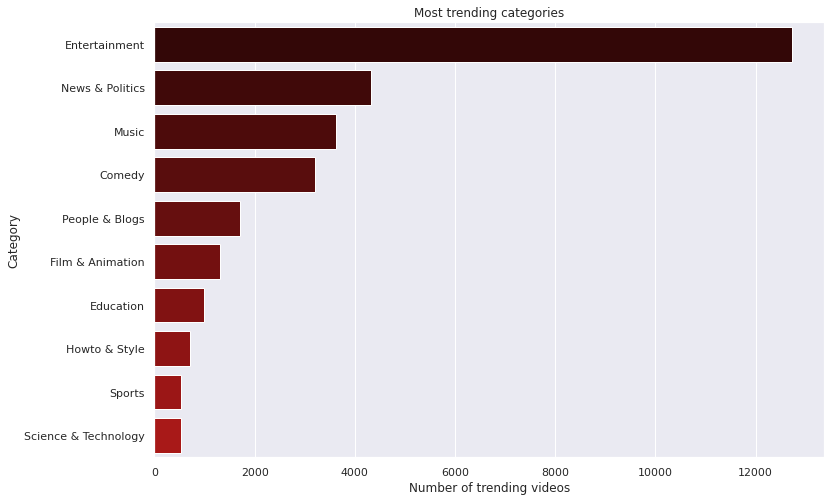

In [19]:
# categories with most trending videos
tdf = df.groupby("category_id").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(10)
sns.barplot(x="video_count", y="category_id", data=tdf,
            palette=sns.color_palette('gist_heat', n_colors=25)[3:]);
set_labels("Most trending categories", "Number of trending videos", "Category")
plt.show()

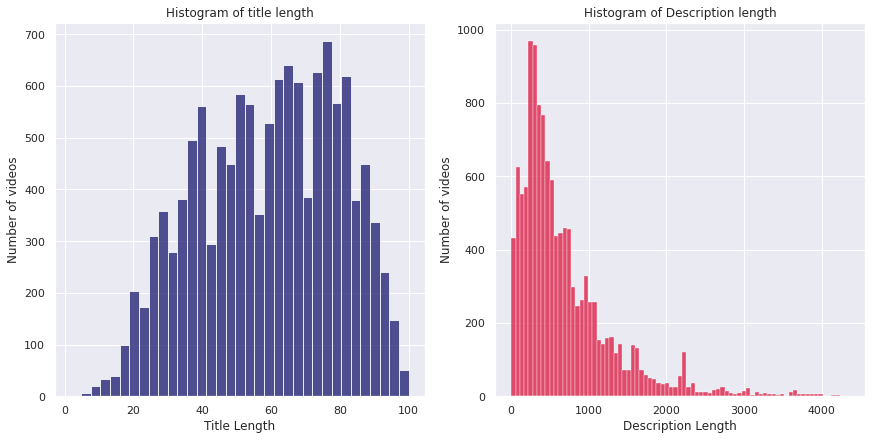

In [20]:
#finding relation between title length and views


tdf = df.sort_values('views',ignore_index=True)

#only keeping the video with the max views
tdf.drop_duplicates(subset = 'video_id',keep='last',inplace=True,ignore_index=True)
tdf = tdf[['title','views','description']]
tdf['description'] = tdf['description'].astype(str)
tdf['title_length'] = 0
tdf['descrip_length'] = 0
for i,x in enumerate(tdf['title']):
    tdf.at[i,'title_length'] = len(tdf.at[i,'title'])
    tdf.at[i,'descrip_length'] = len(tdf.at[i,'description'])
    
fig,ax = plt.subplots(1,2,figsize=(12,6),constrained_layout=True)

sns.histplot(tdf['title_length'],ax=ax[0],color='midnightblue')
ax[0].set_xlabel('Title Length')
ax[0].set_ylabel('Number of videos')
ax[0].set_title('Histogram of title length')
sns.histplot(tdf['descrip_length'],ax=ax[1],color='crimson')
ax[1].set_xlabel('Description Length')
ax[1].set_ylabel('Number of videos')
ax[1].set_title('Histogram of Description length')
plt.show()